# US National Obesity Rate in 2016 (state by state)

- This notebook will explore the obesity rates state by state
- First, the notebook will calculate the national obesity rate 
- Second, the notebook will calculate the  national obesity rate for every state 
- Third, the notebook will show a graph comparing the obesity rates state by state
- The purpose of this notebook is to show what state has the highest and lowest obesity rate

# Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
import seaborn as sns
import numpy as np

### Note: This notebook will use the gender data frame as it provides us with the obesity rates of the entire population (male and female)

# Import and Explore Obesity by Gender Data Frame

In [2]:
obesity_in_US_gender_2016 = pd.read_csv('../data/Clean Data/obesity_in_US_gender_2016.csv')

In [3]:
obesity_in_US_gender_2016

,Unnamed: 0,year,state,state_name,gender_pc,Data_Value_Alt,Question,Sample_Size,Total,Gender,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,0,2016,US,National,41.0,41.0,Percent of adults aged 18 years and older who ...,198440.0,NaN,Male,NaN,59,Gender,Male
1,1,2016,US,National,29.3,29.3,Percent of adults aged 18 years and older who ...,240000.0,NaN,Female,NaN,59,Gender,Female
2,2,2016,AR,Arkansas,38.0,38.0,Percent of adults aged 18 years and older who ...,1918.0,NaN,Male,"(34.74865012400045, -92.27449074299966)",5,Gender,Male
3,3,2016,AR,Arkansas,27.0,27.0,Percent of adults aged 18 years and older who ...,2941.0,NaN,Female,"(34.74865012400045, -92.27449074299966)",5,Gender,Female
4,4,2016,AL,Alabama,38.2,38.2,Percent of adults aged 18 years and older who ...,2711.0,NaN,Male,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,2016,GU,Guam,27.3,27.3,Percent of adults aged 18 years and older who ...,805.0,NaN,Female,"(13.444304, 144.793731)",66,Gender,Female
216,216,2016,PR,Puerto Rico,30.0,30.0,Percent of adults aged 18 years and older who ...,2105.0,NaN,Male,"(18.220833, -66.590149)",72,Gender,Male
217,217,2016,PR,Puerto Rico,31.4,31.4,Percent of adults aged 18 years and older who ...,3423.0,NaN,Female,"(18.220833, -66.590149)",72,Gender,Female
218,218,2016,VI,Virgin Islands,22.2,22.2,Percent of adults aged 18 years and older who ...,468.0,NaN,Male,"(18.335765, -64.896335)",78,Gender,Male


In [4]:
obesity_in_US_gender_2016['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
obesity_in_US_gender_2016['Gender'].value_counts()

Male      110
Female    110
Name: Gender, dtype: int64

# Questions: 

#### Question 1: What is the national obesity rate in 2016?
- Steps: 
    - make national its own data frame named "gender_obesity_in_US_national_2016_df"
    - create a filter "national_avg_2016" to find the mean obesity rate nationally

#### Question 2: What is the average US obesity rate by state in 2016?
- Steps: 
    - create a new data frame that only has US states named "obesity_in_US_gender_2016"
    - create a data frame named "obesity_in_2016_bystate_avg" on the 'obesity_in_US_gender_2016' data frame           to calculate the mean by state
    - use the region mean data to plot a bar chart and add labels

#### Question 3: What state has the highest obesity rate in 2016? What state has the lowest obesity rate in 2016?
- Steps:
    - calculate the mean of the gender_pc column grouping by state 
    - sort it in descending order and name the result "US_in_2016"
    - get the top 5 ranked states and name the result "top5_states"
    - get the bottom 5 ranked states and name the result "bottom5_states"



# Question 1: What is the national obesity rate in 2016?

In [6]:
#make national its own dataframe named "gender_obesity_in_US_national_2016_df"
gender_obesity_in_US_national_2016_df=obesity_in_US_gender_2016[(obesity_in_US_gender_2016['state_name']=='National')]
gender_obesity_in_US_national_2016_df

,Unnamed: 0,year,state,state_name,gender_pc,Data_Value_Alt,Question,Sample_Size,Total,Gender,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,0,2016,US,National,41.0,41.0,Percent of adults aged 18 years and older who ...,198440.0,NaN,Male,NaN,59,Gender,Male
1,1,2016,US,National,29.3,29.3,Percent of adults aged 18 years and older who ...,240000.0,NaN,Female,NaN,59,Gender,Female
110,110,2016,US,National,29.6,29.6,Percent of adults aged 18 years and older who ...,198440.0,NaN,Male,NaN,59,Gender,Male
111,111,2016,US,National,29.5,29.5,Percent of adults aged 18 years and older who ...,240000.0,NaN,Female,NaN,59,Gender,Female


- "gender_obesity_in_US_national_2016_df"
    - this data frame represents the country as a whole 
    - use it to calculate national obesity rate as a whole

In [7]:
gender_obesity_in_US_national_2016_df['Gender'].value_counts()

Male      2
Female    2
Name: Gender, dtype: int64

In [8]:
# Create a filter "national_avg_2016" to find the mean obesity rate nationally
national_avg_2016=gender_obesity_in_US_national_2016_df['gender_pc'].mean()
national_avg_2016


32.35

In [9]:
# Use "national_avg_2016" filter to show the national obesity rate average on chart
national_avg_2016=gender_obesity_in_US_national_2016_df.groupby('state_name')['gender_pc'].mean()
national_avg_2016
title1='The national obesity rate average in 2016'
print("{}\n{}".format(title1, '='*len(title1)))
print(national_avg_2016.sort_values())





The national obesity rate average in 2016
state_name
National    32.35
Name: gender_pc, dtype: float64


### Answer: The national obesity rate average in 2016 was 32.4%

Text(0.5, 1.0, '2016')

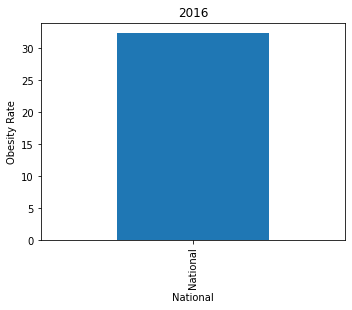

In [10]:

# 1. Set up the figure to plot two bar charts and specify size ratio (3:1)
plt.figure(figsize=(12,4))

# 2. the plt.subplot() function divides the main figure into rows and columns
#    121 = 1 row 2 columns and the first slot
plt.subplot(121)

# use the national_avg_2015 mean data to plot a bar chart and add labels
national_avg_2016.plot(kind='bar')
plt.xlabel('National')
plt.ylabel('Obesity Rate')
plt.title('2016')


# **Create a new data frame that only has US states

In [11]:
# Create a data frame named "obesity_in_US_gender_2016" that excludes the rows 
# with the value "National", Guam", "Puerto Rico", "Virgin Islands" in the LocationDesc column
obesity_in_US_gender_2016=obesity_in_US_gender_2016[~(obesity_in_US_gender_2016['state_name']=='National')]
obesity_in_US_gender_2016=obesity_in_US_gender_2016[~(obesity_in_US_gender_2016['state_name']=='Guam')]
obesity_in_US_gender_2016=obesity_in_US_gender_2016[~(obesity_in_US_gender_2016['state_name']=='Puerto Rico')]
obesity_in_US_gender_2016=obesity_in_US_gender_2016[~(obesity_in_US_gender_2016['state_name']=='Virgin Islands')]
obesity_in_US_gender_2016['state_name'].unique()


array(['Arkansas', 'Alabama', 'Alaska', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

# Question 2: What is the average US obesity rate by state?

In [12]:
# create a data frame named "obesity_in_2016_bystate_avg" on the 'obesity_in_US_gender_2016' data frame to calculate the mean by state 
obesity_in_2016_bystate_avg = obesity_in_US_gender_2016.sort_values(['state_name'], ascending = [True])
obesity_in_2016_bystate_avg=obesity_in_2016_bystate_avg[['state','state_name','gender_pc','Gender']]
obesity_in_2016_bystate_avg = obesity_in_2016_bystate_avg.groupby('state_name')['gender_pc'].mean()
obesity_in_2016_bystate_avg



state_name
Alabama                 34.775
Alaska                  33.150
Arizona                 31.575
Arkansas                34.125
California              30.500
Colorado                28.925
Connecticut             30.875
Delaware                34.050
District of Columbia    26.800
Florida                 31.600
Georgia                 32.900
Hawaii                  28.675
Idaho                   32.175
Illinois                32.550
Indiana                 33.550
Iowa                    34.225
Kansas                  33.250
Kentucky                34.525
Louisiana               34.625
Maine                   32.600
Maryland                32.275
Massachusetts           30.075
Michigan                33.725
Minnesota               32.250
Mississippi             35.675
Missouri                33.600
Montana                 31.200
Nebraska                34.200
Nevada                  31.025
New Hampshire           31.625
New Jersey              31.875
New Mexico              32.4

In [13]:
obesity_in_2016_bystate_avg = obesity_in_US_gender_2016.sort_values(['state_name'], ascending = [True])
obesity_in_2016_bystate_avg=obesity_in_2016_bystate_avg[['state','state_name','gender_pc','Gender']]
obesity_in_2016_bystate_avg = obesity_in_2016_bystate_avg.groupby('state_name')['gender_pc'].mean()
state_avg = obesity_in_2016_bystate_avg.to_frame()

In [ ]:
state_avg = state_avg.reset_index(drop = True)

In [ ]:
# 1. Set up the figure to plot bar chart
plt.figure(figsize=(20,4))
plt.subplot

# use the 'obesity_in_2016_bystate_avg' mean data to plot a bar chart and add labels
obesity_in_2016_bystate_avg.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Obesity Rate')
plt.title('US Obesity Rates by State in 2016')

Text(0.5, 1.0, 'US Obesity Rates by State in 2016')

# Question 3: What state has the highest obesity rate in 2016? What state has the lowest obesity rate in 2016?

In [ ]:
# 1. calculate the mean of the gender_pc column grouping by state 
#    sort it in descending order and name the result "US_in_2016"

# 2. get the top 5 ranked states and name the result "top5_states"

# 3. get the bottom 5 ranked states and name the result "bottom5_states"

US_in_2016=obesity_in_US_gender_2016.groupby('state_name')['gender_pc'].mean().sort_values(ascending=False)
top5_states = US_in_2016.head(5)
bottom5_states = US_in_2016.tail(5)



print("Measuring US obesity rates by state.\n")
print(f"The top 5 states are { ', '.join(top5_states.index)}")
print(f"The bottom 5 states are { ', '.join(bottom5_states.index)}")
US_in_2016.sort_values(ascending=False).to_frame()

### Mississippi had the highest US obesity rate in 2016 at 35.7% and Hawaii had the lowest US obesity rate in 2016 at 28.7%

# Conclusion

## National Obesity Rate
- The national obesity rate average in 2016 was 32.4%
- Mississippi had the highest US obesity rate in 2016 at 35.7% and Hawaii had the lowest US obesity rate in 2016 at 28.7%